In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from PIL import Image
from torchvision.datasets import DatasetFolder
import torchvision
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm as tqdm
import torch.nn.functional as F

In [2]:
# hyperparameter
batch_size = 32
lr_generator = 0.0001
lr_discriminator = 0.0001
in_img = 784
epochs = 20

In [3]:
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print("CUDA is not available")
else:
    print("CUDA is available")
device = 'cuda' if train_on_gpu else 'cpu'

CUDA is available


In [4]:
# mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=None)

trans = transforms.Compose([transforms.ToTensor()])
train_data = torchvision.datasets.MNIST('mnist/', train=True, download=False, transform=trans)
test_data = torchvision.datasets.MNIST('mnist/', train=False, download=False, transform=trans)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

/home/max/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
def imshow(imgs):
    imgs = torchvision.utils.make_grid(imgs)
    npimgs = imgs.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimgs, (1,2,0)), cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    plt.show()

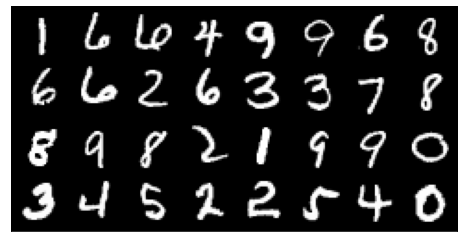

In [6]:
img, label = next(iter(test_loader))
imshow(img)

In [7]:
# GAN 

# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.dis = nn.Sequential(
            nn.Linear(in_img, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        return self.dis(x)
    
    
# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.gen = nn.Sequential(
            nn.Linear(100, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, in_img),
            nn.Tanh()
        )
    def forward(self, x):
        return self.gen(x)

In [8]:
def des_loss(x, y):
    return nn.BCELoss()(x, y)
def gen_loss(x):
    y = torch.ones([x.shape[0], 1])
    y = y.to(device)
    return nn.BCELoss()(x, y)

In [9]:
G = Generator().to(device)
D = Discriminator().to(device)
g_opt = optim.Adam(G.parameters(), lr=lr_generator)
d_opt = optim.Adam(D.parameters(), lr=lr_discriminator)
print(G)
print(D)

Generator(
  (gen): Sequential(
    (0): Linear(in_features=100, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=1024, out_features=784, bias=True)
    (5): Tanh()
  )
)
Discriminator(
  (dis): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:0, Generator_loss:0.6982384324073792, Discriminator_loss:1.3767890930175781


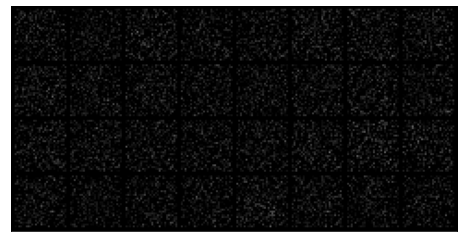

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:1, Generator_loss:7.443637371063232, Discriminator_loss:0.0017271910328418016


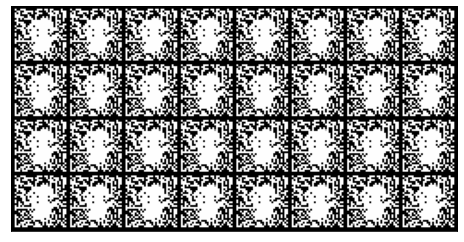

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:2, Generator_loss:12.937188148498535, Discriminator_loss:0.003968940116465092


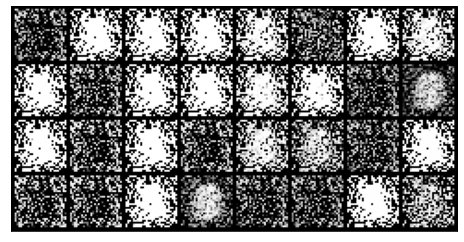

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:3, Generator_loss:1.449977159500122, Discriminator_loss:1.2663846015930176


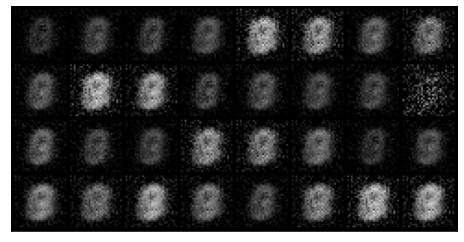

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:4, Generator_loss:1.4973088502883911, Discriminator_loss:1.1939358711242676


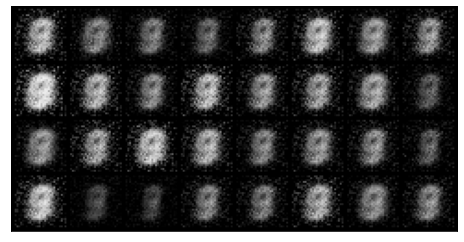

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:5, Generator_loss:1.7250359058380127, Discriminator_loss:0.9329438209533691


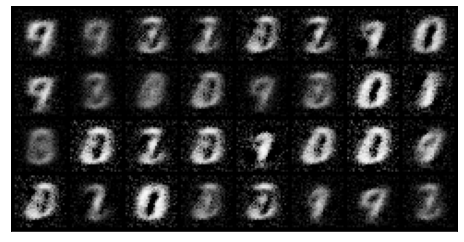

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:6, Generator_loss:1.2070114612579346, Discriminator_loss:1.4091070890426636


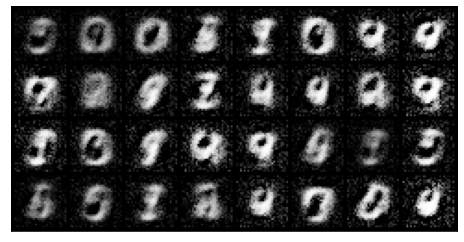

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:7, Generator_loss:1.0677562952041626, Discriminator_loss:1.1746513843536377


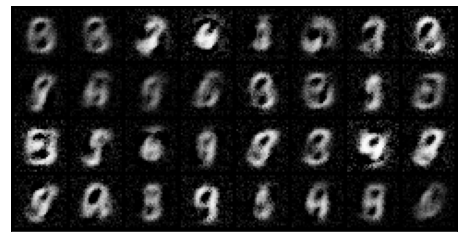

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:8, Generator_loss:1.6312453746795654, Discriminator_loss:0.9020427465438843


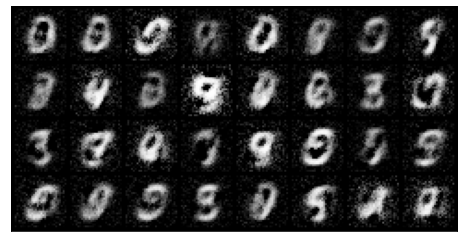

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:9, Generator_loss:1.463141918182373, Discriminator_loss:1.2764265537261963


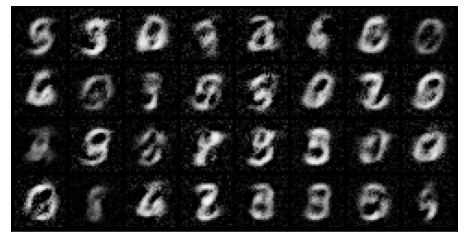

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:10, Generator_loss:1.9114701747894287, Discriminator_loss:0.5768746733665466


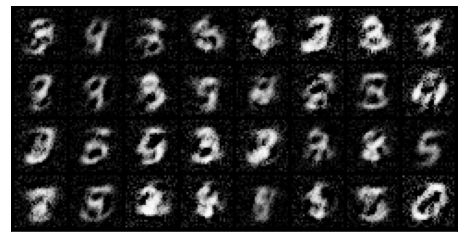

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:11, Generator_loss:1.94058096408844, Discriminator_loss:0.910094141960144


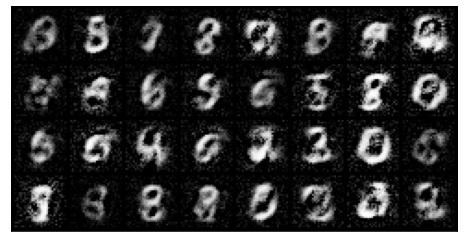

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:12, Generator_loss:1.6668055057525635, Discriminator_loss:0.9210793972015381


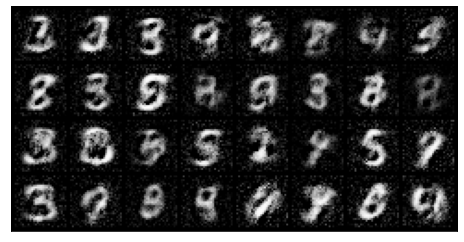

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:13, Generator_loss:1.4733631610870361, Discriminator_loss:0.7171169519424438


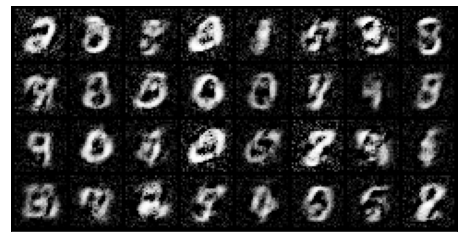

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:14, Generator_loss:1.7096744775772095, Discriminator_loss:0.9365977644920349


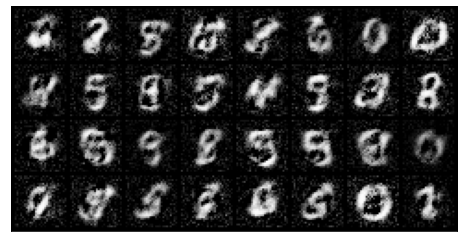

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:15, Generator_loss:1.7911853790283203, Discriminator_loss:0.7781410813331604


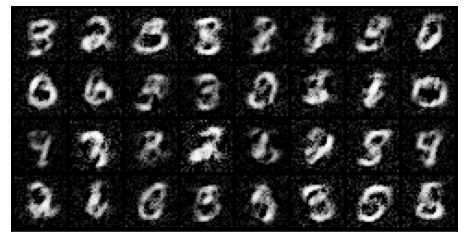

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:16, Generator_loss:1.776178240776062, Discriminator_loss:0.7104932069778442


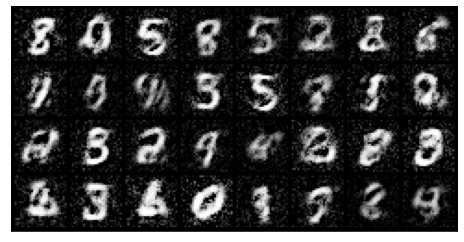

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:17, Generator_loss:1.6393505334854126, Discriminator_loss:0.8966803550720215


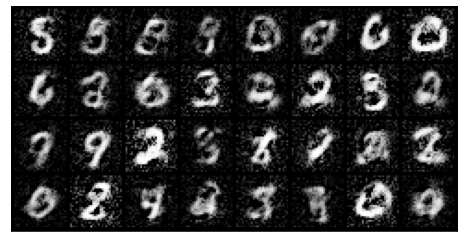

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:18, Generator_loss:1.7029550075531006, Discriminator_loss:0.6087473630905151


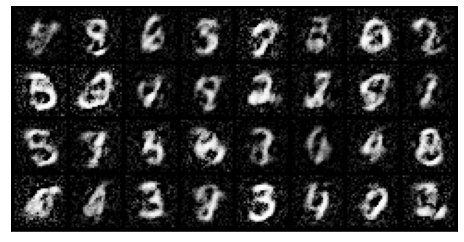

0it [00:00, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch:19, Generator_loss:1.6043872833251953, Discriminator_loss:0.8599202632904053


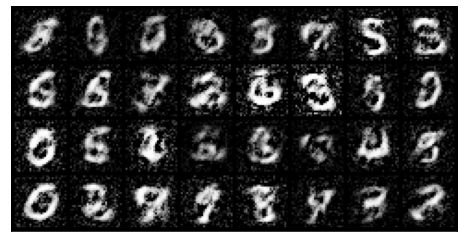

In [10]:
## Training
for epoch in range(epochs):
    g_total_loss = 0.0
    d_total_loss = 0.0
    a = 0
    for idx, data in tqdm(enumerate(train_loader)):
        x, _ = data
        x = x.view(x.size(0), -1).to(device)
        _size = x.size(0)
        ## real img is one
        ## fake img is zero
        one_label = torch.ones(_size, 1).to(device) ## size = [5, 1]
        zero_label = torch.zeros(_size, 1).to(device) ## size = [5, 1]
        ## noise
        noise = torch.randn(_size, 100).to(device) ## add gaussian white noise
        d_real = D(x) ## train discriminator
        d_fake = D(G(noise))
        
        d_real_loss = F.binary_cross_entropy(d_real, one_label)
        d_fake_loss = F.binary_cross_entropy(d_fake, zero_label)
        dis_loss = d_real_loss + d_fake_loss
        
        d_opt.zero_grad()
        dis_loss.backward() ## back propagation
        d_opt.step()
        
        noise = torch.randn(_size, 100).to(device) ## add gaussian white noise
        d_fake = D(G(noise))
        g_loss = F.binary_cross_entropy(d_fake, one_label)
        
        g_opt.zero_grad()
        g_loss.backward()
        g_opt.step()
        ## use item can avoid lots of complexity exchange
        g_total_loss += g_loss.item()
        d_total_loss += dis_loss.item()
        
        if(a == 0):
            print(f'Epoch:{epoch}, Generator_loss:{g_total_loss/(idx+1)}, Discriminator_loss:{d_total_loss/(idx+1)}')
#             if(epoch % 10 == 0):
            samples = G(noise).detach()
            samples = samples.view(samples.size(0), 1, 28, 28).cpu()
            imshow(samples)
        a += 1